<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ?
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

# Etape 1 - Importation des librairies et chargement des fichiers

## 1.1 Importation des librairies

In [ ]:
#Importation de la librairie Pandas > + import des bibliothèques nécessaire pour l'exercice
import pandas as pd     #manipulation et analyse des données via des DATAFRAME
import numpy as np      #Calculs et opérations sur des tables
import matplotlib.pyplot as plt  #Création de graphique
import seaborn as sns            #Graphique enrichis 'surcouche' de matplotlib

In [ ]:
from google.colab import drive #depuis GoogleColab on import le drive
drive.mount('/content/drive')  #chemin du drive pour lire/écrire des fichiers

Mounted at /content/drive


## 1.2 Chargement des fichiers Excel

In [ ]:
#Importation du fichier population.csv
population = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P4/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P4/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P4/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('/content/drive/MyDrive/Formation DATA ANALYST/P4/sous_nutrition.csv')

# Etape 2 - Analyse exploratoire des fichiers

## 2.1 - Analyse exploratoire du fichier population

In [ ]:
# Afficher les dimensions du dataset

population.shape # affiche le tuple ligne / colonnes

(1416, 3)

In [ ]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

population.info()

# .info() = Methode qui affiche un résumé détaillé du DATAFRAME : Nb ligne - Nb colonne et Nom - type de données (int, float, object) - Nb valeur NN - usage mémoire du DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [ ]:
#Affichage les 5 premières lignes de la table

population.head() # .head() retourne par défaut les 5 premières lignes. On peut ajuster ce nombre en le précisant entre les parenthèses.

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [ ]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000

population["Valeur"] = population["Valeur"] * 1000. # Modifie le dataframe population dans cette session.
                                                    # Pour enregistrer les modifications sur un CSV : population.to_csv('population_modifiee.csv', index=False)

In [ ]:
#changement du nom de la colonne Valeur par Population

population.rename(columns={"Valeur": "Population"}, inplace=True) # .rename est une méthode qui permet de renommer une colonne.
                                                                  # inplace=True permet de modifier directement cela dans le dataframe initial.

In [ ]:
#Affichage les 5 premières lignes de la table pour voir les modifications

population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


## 2.2 - Analyse exploratoire du fichier disponibilité alimentaire

In [ ]:
#Afficher les dimensions du dataset

dispo_alimentaire.shape

(15605, 18)

In [ ]:
#Consulter le nombre de colonnes

dispo_alimentaire.shape[1] # L’indice [1] isole le nombre de colonnes. [0] isole le nombre de lignes.

18

In [ ]:
#Affichage les 5 premières lignes de la table

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Remplacement des NaN dans le dataset par des 0.

dispo_alimentaire.fillna(0, inplace=True) # .fillna est une méthode pandas qui remplace les valeurs manquantes (NaN - None)
                                          # on place (O) en argument pour remplacer les NaN par des 0. inplaceTrue rend irréversible les changements précédents
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Multiplication de toutes les lignes contenant des milliers de tonnes (mt) en Kg

# Selection et stockage des colonnes concernées dans une variable de type liste.

colonnes_mt = ['Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes',
               'Production', 'Semences', 'Traitement', 'Aliments pour animaux',
               'Autres Utilisations', 'Variation de stock']

dispo_alimentaire[colonnes_mt] = dispo_alimentaire[colonnes_mt] * 1_000_000 # Multiplication des colonnes concernées.


In [ ]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


## 2.3 - Analyse exploratoire du fichier aide alimentaire

In [ ]:
#Afficher les dimensions du dataset

aide_alimentaire.shape

(1475, 4)

In [ ]:
#Consulter le nombre de colonnes

aide_alimentaire.shape[1]

4

In [ ]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
#changement du nom de la colonne Pays bénéficiaire par Zone

aide_alimentaire.rename(columns={"Pays bénéficiaire": "Zone"}, inplace=True)
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [ ]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg

aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [ ]:
# Changement du nom de la colonne 'Valeur' par 'Quantité en kg'

aide_alimentaire.rename(columns={'Valeur' : 'Quantité en kg'} , inplace=True)

In [ ]:
#Affichage les 5 premières lignes de la table

aide_alimentaire.head()

,Zone,Année,Produit,Quantité en kg
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


## 2.4 - Analyse exploratoire du fichier sous nutrition

In [ ]:
#Afficher les dimensions du dataset

sous_nutrition.shape

(1218, 3)

In [ ]:
#Consulter le nombre de colonnes

sous_nutrition.shape[1]

3

In [ ]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
#changement du nom de la colonne Valeur par sous_nutrition

sous_nutrition.rename(columns={"Valeur": "sous_nutrition"}, inplace=True)
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [ ]:
#Conversion de la colonne sous_nutrition (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0

sous_nutrition["sous_nutrition"] = pd.to_numeric(sous_nutrition["sous_nutrition"], errors="coerce")
# pd.to_numeric convertit la colonne Valeur en type numérique. errors='coerce' transforme
# les valeurs non convertible (<0.1 dans notre fichier) en NaN

sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"].fillna(0)
# Remplace tous les NaN par des 0. Cela garantit que la colonne est entièrement numérique et évite les erreurs de calcul

In [ ]:
#Multiplication de la colonne sous_nutrition par 1000000

sous_nutrition['sous_nutrition'] = sous_nutrition['sous_nutrition'] * 1_000_000

In [ ]:
#Afficher les 5 premières lignes de la table

sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


## 3.1 - Proportion de personnes en sous nutrition

In [ ]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017

df_sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == '2016-2018'] #selectionne l'intervalle 2016-2018 et le stock dans un nouveau dataframe
df_population_2017 = population.loc[population['Année'] == 2017]                    # Selectionne l'année 2017 et stock l'info dans un nouveau dataframe

df_pop_sous_nut_2017 = pd.merge(df_population_2017, df_sous_nutrition_2017, on='Zone', how='left') # effectue une jointure à gauche, on conserve les lignes de df_population_2017
                                                                                                   # et ajoute (si elle existe) les valeurs de df_sous_nutrition_2017
                                                                                                   # Le résultat de la jointure est stocké dans un nouveau dataframe

In [ ]:
#Affichage du dataset

df_pop_sous_nut_2017.head()

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0


In [ ]:
# On se retrouve avec deux colonne Année (X et Y), je décide de conserver Année_x car plus lisible que les intervalles.

df_pop_sous_nut_2017.drop('Année_y', axis=1, inplace=True) # .drop supprime la colonne identifiée grace à axis=1 (colonne), 0 = lignes
df_pop_sous_nut_2017.rename(columns={"Année_x": "Année"}, inplace=True) # Renomme la colonne Année_x par Année columns={'ancien' : 'nouveau'}
df_pop_sous_nut_2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [ ]:
#Calcul et affichage du nombre de personnes en état de sous nutrition

total_sous_nut_2017 = df_pop_sous_nut_2017['sous_nutrition'].sum() # On crée une variable pour stocker le résultat (total_pop_sous_nut_2017)
                                                                   #.sum() pour obtenir la somme de la colonne 'sous_nutrition'.

print(f'il y a {total_sous_nut_2017} de personnes en sous nutrition') #On affiche le résultat en appelant la variable ou est stocké le résultat


il y a 535700000.0 de personnes en sous nutrition


In [ ]:
# Calcul de la totalité de la population mondiale en 2017

total_population_2017 = df_population_2017['Population'].sum()

print(total_population_2017)

7548134111.0


In [ ]:
# Calcul du pourcentage de personne ne sous nutrition en 2017

pct_pop_sous_nut_2017 = (total_sous_nut_2017 / total_population_2017) * 100

print(f"population 2017 en sous nutrition = {pct_pop_sous_nut_2017:.2f} %")

population 2017 en sous nutrition = 7.10 %


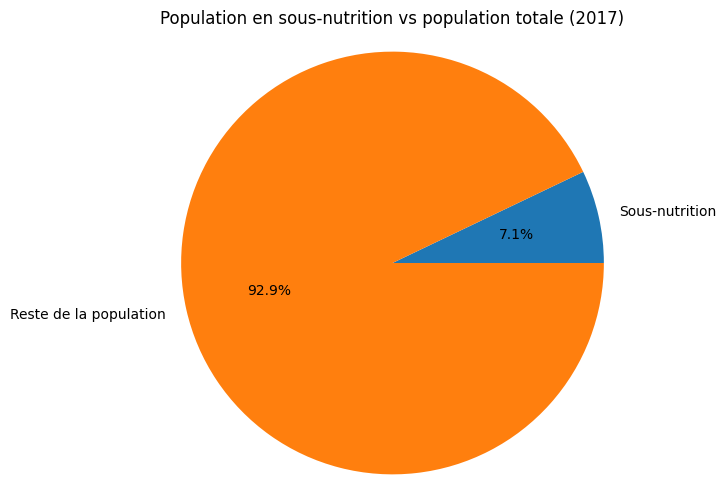

In [ ]:
# Création graphique : Population en sous-nutrition VS Population mondiale 2017

restant_pop_2017 = total_population_2017 - total_sous_nut_2017 # Calcule du nombre de personne qui ne sont pas en situation de sous-nutrition

# Préparation des données pour le camembert
size = [total_sous_nut_2017, restant_pop_2017]          # Liste des deux valeurs numériques qui seront représentées
nom_part = ['Sous-nutrition', 'Reste de la population'] # Liste d'étiquettes apparaissant dans la légende ou à coté des parts

fig, ax = plt.subplots(figsize=(6, 6))            # fig = conteneur global ; figsize = dimension du graphique en pouce ; plt.subplots ?
ax.pie(size, labels=nom_part, autopct='%1.1f%%') # Tracé du diagramme (pie), size : valeur à représenter ; labels : noms des parts ; autopct : format d'affichage sur chaque tranche

ax.axis('equal')                                # Force le rapport 1:1 sinon le cercle ovale si la fenetre n'est pas carré
plt.title('Population en sous-nutrition vs population totale (2017)') # Titre du graphique
plt.show()                                                            # Permet d'afficher

## 3.2 - Nombre théorique de personne qui pourrait être nourries

In [ ]:
#Combien mange en moyenne un être humain ? entre 2000 et 2500 kcal/jour (pour un humain de 70kg - activité modérée) Disons 2250 pour avoir une marge


#Source =>

#https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte.html

#https://www.msdmanuals.com/fr/accueil/multimedia/table/nombre-de-calories-n%C3%A9cessaires-estim%C3%A9-dapr%C3%A8s-l%C3%A2ge-le-sexe-et-le-niveau-dactivit%C3%A9-physique

#https://www.unfpa.org/fr/data/world-population-dashboard#:~:text=Pourcentage%20de%20la%20population%20%C3%A2g%C3%A9e,de%2065%20ans%20et%20plus.


In [ ]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population

df_dispo_pop = pd.merge(dispo_alimentaire, df_population_2017, on='Zone', how='left') # jointure à gauche avec pour PK "Zone"

In [ ]:
#Affichage du nouveau dataframe

df_dispo_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,2017.0,36296113.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0


In [ ]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement

df_dispo_pop['dispo_kcal'] = df_dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * df_dispo_pop['Population']

# Ajoute la colonne dispo_kcal et calcule le total de calorie disponible dans la zone pour ce produit


In [ ]:
# Calcul de la somme des disponibiltés calorique par personne et par jour

total_dispo_kcal = df_dispo_pop['dispo_kcal'].sum()

print(f"Total mondial de disponibilité calorique par jour : {total_dispo_kcal:_.0f} kcal") # : séparateur de milliers / . séparateur qui précède le nombre décimal
                                                                                           # 0 nombre de décimales affichées (ici 0) / f type 'fixed-point' (décimale classique)

Total mondial de disponibilité calorique par jour : 20_918_984_627_331 kcal


In [ ]:
#Calcul du nombre d'humains pouvant être nourris

nombre_humains_nourris = total_dispo_kcal / 2250
print(f"Le nombre d'humains pouvant être nourris est de {nombre_humains_nourris:_.0f}")


Le nombre d'humains pouvant être nourris est de 9_297_326_501


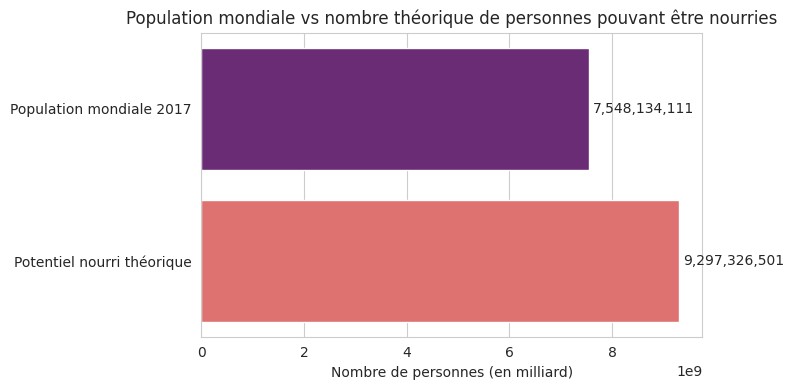

In [ ]:
# Graphique : Population mondiale VS nombre théorique de personnes pouvant etre nourries

# Création d'un dataframe de comparaison : 2 colonnes 'Catégorie' (txt) et 'Nombre (numérique) / 2 lignes : population 2017 et capacité théorique d'alimentation
df_compare = pd.DataFrame({
    'Catégorie': ['Population mondiale 2017', 'Potentiel nourri théorique'],
    'Nombre': [total_population_2017, nombre_humains_nourris]
})

# Partie graphique

sns.set_style("whitegrid") # Arrière plan quadrillé
plt.figure(figsize=(8, 4)) # Nouvelle figure de 8 pouces par 4 (longueur x hauteur)
sns.barplot(               # Tracé graphique en barre
    data=df_compare,       # DataFrame source
    y='Catégorie',         # Catégorie de l'axe vertical
    x='Nombre',            # Valeur numérique (longueur des barres)
    palette='magma',       # choix du dégradé de couleur 'magma'
    hue='Catégorie'        # couleur différenciée par 'Catégorie'
)

# Boucle pour ajouter la valeur brute au bout de chaque barre
for idx, row in df_compare.iterrows(): # .iterrows = parcourt chaque ligne du df
    plt.text(
        x=row['Nombre'] * 1.01,       # Décale l'étiquette à droite de la barre
        y=idx,                        # Index du dataframe (hauteur)
        s=f"{row['Nombre']:,.0f}",    # texte affiché avec formatage de l'affichage
        va='center'                   # Alignement du texte centré sur la barre
    )

# Titre axes et mise en page
plt.title("Population mondiale vs nombre théorique de personnes pouvant être nourries") # Titre du graphique
plt.xlabel("Nombre de personnes (en milliard)")      # Tritre de l'axe x
plt.ylabel("")                                       # Titre de l'axe y (vide ici)
plt.tight_layout()                                   # Ajustement automatique des marges et espacements
plt.show()                                           # Rend le graphique visible

## 3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux

In [ ]:
#Transfert des données avec les végétaux dans un nouveau dataframe

df_dispo_pop_vegetale = df_dispo_pop.loc[df_dispo_pop['Origine'] == 'vegetale']
df_dispo_pop_vegetale.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,...,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,...,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,36296113.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,...,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,145184452.0
6,Afghanistan,Bière,vegetale,0.0,0.0,0.0,0.09,0.00,0.00,3000000.0,...,3000000.0,3000000.0,0.0,0.0,0.0,0.0,0.0,2017.0,36296113.0,0.0


In [ ]:
#Calcul du nombre de kcal disponible pour les végétaux

# création d'une variable dispo_kcal_vegetal pour calculer la somme 'dispo_kcal' (kcal/personne/jour × population)
dispo_kcal_vegetale = df_dispo_pop_vegetale['dispo_kcal'].sum()

print(f"Le nombre total de kcal disponibles par jour pour les produits végétaux est de {dispo_kcal_vegetale:_.0f} kcal") # affichage sans décimal + séparateurs de milliers

Le nombre total de kcal disponibles par jour pour les produits végétaux est de 17_260_764_211_501 kcal


In [ ]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux

nb_humain_nourris_vege = dispo_kcal_vegetale / 2250

proportion_nourris_vege = (nb_humain_nourris_vege / total_population_2017) * 100


print(f"Nombre d’humains pouvant être nourris : {nb_humain_nourris_vege:_.0f} Ce qui représente {proportion_nourris_vege:.2f} % de la population mondiale en 2017")

Nombre d’humains pouvant être nourris : 7_671_450_761 Ce qui représente 101.63 % de la population mondiale en 2017


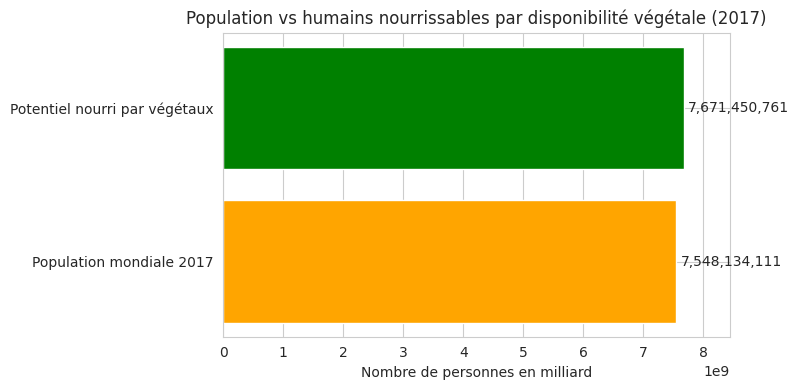

In [ ]:
# Graphique : Population VS humains nourrissables avec végétaux (2017)

# Création d'un dataframe de comparaison
df_vege = pd.DataFrame({
    'Catégorie': ['Population mondiale 2017', 'Potentiel nourri par végétaux'], # 2 libellés : réel vs potentiel végétal
    'Nombre': [total_population_2017, nb_humain_nourris_vege]                   # Valeurs : effectif mondial & capacité végétale
})


fig, ax = plt.subplots(figsize=(8, 4)) # Nouvelle figure
colors = ['orange', 'green']           # Couleurs
ax.barh(df_vege['Catégorie'], df_vege['Nombre'], color=colors) # Barre horizontales : longueur = nombre de personnes / couleur = selon liste colors


ax.set_xlabel("Nombre de personnes en milliard") # Label axe x
ax.set_title("Population vs humains nourrissables par disponibilité végétale (2017)") # Titre du graphique
ax.set_xlim(0, df_vege['Nombre'].max() * 1.1) # Laisse une marge pour afficher les valeurs par la suite


for i, value in enumerate(df_vege['Nombre']): # enumerate transforme une liste, tuple ou objet pandas en une suite de couples (index, valeur).
    ax.text(value * 1.01, i, f"{value:,.0f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 3.4 - Utilisation de la disponibilité intérieure

In [ ]:
#Calcul de la disponibilité totale 2017

dispo_total_interieure = df_dispo_pop['Disponibilité intérieure'].sum() #dispo_total_interieure est une variable qui enregistre la somme des disponibilités intérieure mondiale
                                                                        # toutes catégories, produit, zone confondue
print(f'la dispo total intérieure est de {dispo_total_interieure} Kg')

la dispo total intérieure est de 9848994000000.0 Kg


In [ ]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures

colonnes_usage = ['Aliments pour animaux', 'Pertes', 'Nourriture', 'Semences', 'Traitement', 'Autres Utilisations'] # Selection des colonnes dans une liste

for col in colonnes_usage:

    part_pct = df_dispo_pop[col].sum() / dispo_total_interieure * 100
    print(f"{col} représente {part_pct:.2f} % de la disponibilité intérieure mondiale")


Aliments pour animaux représente 13.24 % de la disponibilité intérieure mondiale
Pertes représente 4.61 % de la disponibilité intérieure mondiale
Nourriture représente 49.51 % de la disponibilité intérieure mondiale
Semences représente 1.57 % de la disponibilité intérieure mondiale
Traitement représente 22.38 % de la disponibilité intérieure mondiale
Autres Utilisations représente 8.78 % de la disponibilité intérieure mondiale


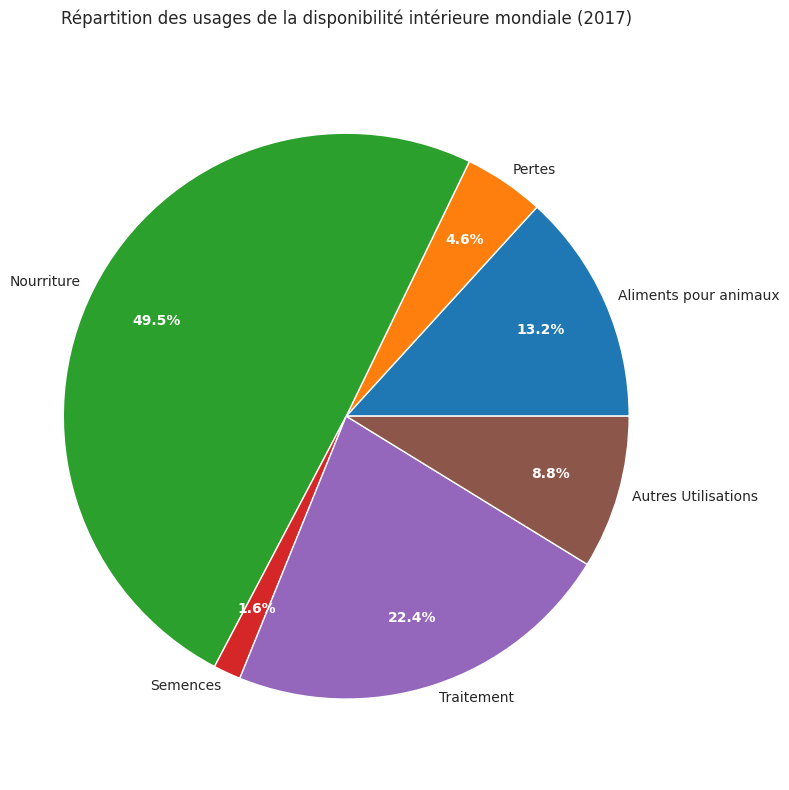

In [ ]:
# Graphique : Répartition des usages de la disponibilité intérieure mondiale 2017

#Calcule pour chaque colonne (usage), la part % qu'elle représente dans la disponibilité intérieure 2017
pourcentages = [df_dispo_pop[col].sum() / dispo_total_interieure * 100
    for col in colonnes_usage
]

# DataFrame pour le graphique
df_usage = pd.DataFrame({
    'Usage': colonnes_usage,    # colonne 1 : libellé des usages
    'Pourcentage': pourcentages # Colonne 2 : poucentage calculé au dessus
})

# Thème Seaborn - fond quadrillage blanc
sns.set_style("whitegrid")

plt.figure(figsize=(8, 8))            # Nouvelle figure 8 x 8
wedges, texts, autotexts = plt.pie(   # wedges : objet graphique pour chaque secteur / texts : labels externes / autotexts : objets text contenant le pourcentage écrit dans chaque part
    df_usage['Pourcentage'],          # Rayon de chaque part = pourcentage
    labels=df_usage['Usage'],         # étiquettes = noms des usages
    autopct='%1.1f%%',                # affiche un % avec 1 decimale au centre de chaque part
    pctdistance=0.75,                 # distance (%) du texte autopct vers le centre (0=centre, 1=bord)
    labeldistance=1.05                # distance des labels au-delà du bord du cercle
)

for txt in autotexts:                # Boucle for sur chaque pourcentage écrit
    txt.set_color('white')           # Met le texte en blanc
    txt.set_fontweight('bold')       # Texte en gras

plt.title("Répartition des usages de la disponibilité intérieure mondiale (2017)", pad=20) # Titre (20 point au dessus du camembert)
plt.axis('equal') # Assure un cercle parfait
plt.tight_layout() # ajuste les marges automatiquement (évite les chevauchements)
plt.show() # Affiche le graphique

## 3.5 - Utilisation des céréales

In [ ]:
#Création d'une liste avec toutes les variables

liste_cereales = [
    'Blé',
    'Céréales, Autres',
    'Maïs',
    'Millet',
    'Orge',
    'Riz (Eq Blanchi)',
    'Avoine',
    'Seigle',
    'Sorgho'
]


In [ ]:
#Création d'un dataframe avec les informations uniquement pour ces céréales

df_dispo_cereales = df_dispo_pop.loc[df_dispo_pop['Produit'].isin(liste_cereales), :]
# Création du DF dispo_cereales > .loc va chercher dans 'Produit', les éléments de la liste uniquement.
# .isin crée un masque qui renvoie un boleen. True si l'élement est dans la liste

df_dispo_cereales.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,...,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0,2017.0,36296113.0,4.968938e+10
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,2017.0,36296113.0,0.000000e+00
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,...,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0,2017.0,36296113.0,7.622184e+08
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,...,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0,2017.0,36296113.0,1.088883e+08
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,...,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0,2017.0,36296113.0,9.436989e+08


In [ ]:
#Affichage de la proportion d'alimentation animale (d'origine animale par rapport à la disponibilité intérieure)

total_alim_animale = df_dispo_pop.loc[df_dispo_pop['Origine'] == 'animale', 'Disponibilité intérieure'].sum()

# Calcule de la proportion

proportion_animale = total_alim_animale / dispo_total_interieure * 100

print(f"Origine animale : {proportion_animale:.2f} % de la disponibilité intérieure mondiale tout produit confondu")

Origine animale : 13.88 % de la disponibilité intérieure mondiale tout produit confondu


In [ ]:
#Affichage de la proportion d'alimentation végétale (d'origine végétale par rapport à la disponibilité intérieure)

total_alim_vegetale = df_dispo_pop.loc[df_dispo_pop['Origine'] == 'vegetale', 'Disponibilité intérieure'].sum()

# Calcule de la proportion
proportion_vegetale = total_alim_vegetale / dispo_total_interieure * 100

print(f"Origine vegetale : {proportion_vegetale:.2f} % de la disponibilité intérieure mondiale tout produit confondu")

Origine vegetale : 86.12 % de la disponibilité intérieure mondiale tout produit confondu


In [ ]:
# Répartition et calcule de la part de céréale dans la disponibilité intérieure

total_cereales = df_dispo_cereales['Disponibilité intérieure'].sum()

part_cereales_sur_total = total_cereales / dispo_total_interieure * 100

part_par_produit_cereale = (df_dispo_cereales.groupby('Produit')['Disponibilité intérieure'].sum() / total_cereales * 100)

print(f"Les céréales représentent {part_cereales_sur_total:.2f}% de la disponibilité intérieure mondiale.")
print("Répartition parmi les céréales :")
for produit, pct in part_par_produit_cereale.sort_values(ascending=False).items():
    print(f"{produit} : {pct:.1f}%")

Les céréales représentent 24.44% de la disponibilité intérieure mondiale.
Répartition parmi les céréales :
Maïs : 39.7%
Blé : 28.2%
Riz (Eq Blanchi) : 19.8%
Orge : 5.8%
Sorgho : 2.4%
Millet : 1.2%
Céréales, Autres : 1.1%
Avoine : 1.0%
Seigle : 0.7%


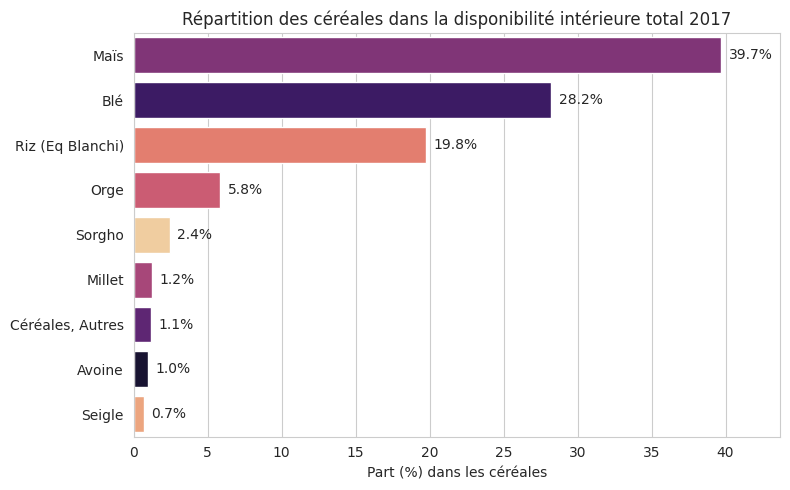

In [ ]:
# Graphique : Répartition des céréales dans la disponibilité intérieure

df_cer = part_par_produit_cereale.reset_index()
df_cer.columns = ['Produit', 'Pourcentage']

order = df_cer.sort_values('Pourcentage', ascending=False)['Produit']

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_cer,
    x='Pourcentage',
    y='Produit',
    hue='Produit',
    order=order,
    palette='magma',
)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + 0.5,           # un peu à droite du bout de la barre
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",       # format à 1 décimale avec caractère %
        va='center'
    )

plt.title(f"Répartition des céréales dans la disponibilité intérieure total 2017")
plt.xlabel("Part (%) dans les céréales")
plt.ylabel("")
plt.xlim(0, df_cer['Pourcentage'].max() * 1.1)
plt.tight_layout()
plt.show()


In [ ]:
# Part de l’utilisation des principales céréales entre l’alimentation humaine et animale

df_usage_cereales = df_dispo_cereales.groupby('Produit')[['Aliments pour animaux', 'Nourriture']].sum()  #Regrouper dispo_cereales par produit et sommer les usages 'nourriture' et 'animale'

df_usage_cereales['Total_usage'] = (df_usage_cereales['Aliments pour animaux'] + df_usage_cereales['Nourriture']) #Calculer le total d’usage pour chaque céréale

df_usage_cereales['Part_animale_%'] = (df_usage_cereales['Aliments pour animaux'] / df_usage_cereales['Total_usage'] * 100) #calculer les parts en pourcentage

df_usage_cereales['Part_humaine_%'] = (df_usage_cereales['Nourriture'] / df_usage_cereales['Total_usage'] * 100)

df_usage_cereales.head(15)


,Aliments pour animaux,Nourriture,Total_usage,Part_animale_%,Part_humaine_%
Produit,,,,,
Avoine,1.625100e+10,3.903000e+09,2.015400e+10,80.634117,19.365883
Blé,1.296680e+11,4.578240e+11,5.874920e+11,22.071449,77.928551
"Céréales, Autres",1.903500e+10,5.324000e+09,2.435900e+10,78.143602,21.856398
Maïs,5.461160e+11,1.251840e+11,6.713000e+11,81.352004,18.647996
Millet,3.306000e+09,2.304000e+10,2.634600e+10,12.548394,87.451606
Orge,9.265800e+10,6.794000e+09,9.945200e+10,93.168564,6.831436
Riz (Eq Blanchi),3.359400e+10,3.772860e+11,4.108800e+11,8.176110,91.823890
Seigle,8.099000e+09,5.502000e+09,1.360100e+10,59.547092,40.452908
Sorgho,2.480800e+10,2.415300e+10,4.896100e+10,50.668900,49.331100


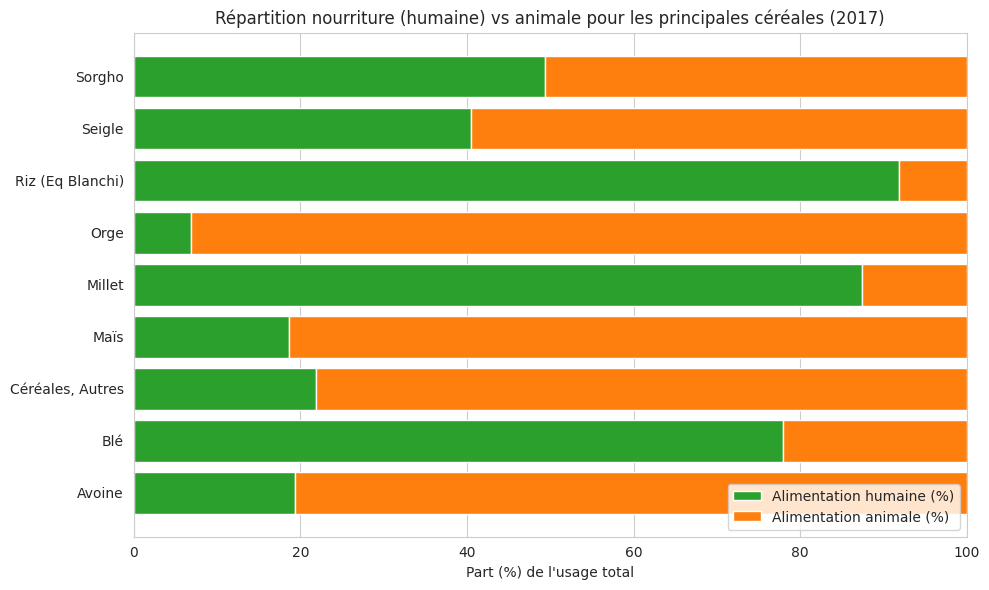

In [ ]:
# Graphique : Répartition nourriture VS alimentation animale pour les cereales (2017)

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(                                    # Première serie
    df_usage_cereales.index,                # Index = noms céréales
    df_usage_cereales['Part_humaine_%'],    # % alimentation humaine
    color='tab:green',                      # Couleur verte
    label='Alimentation humaine (%)'        # légende
)
ax.barh(                                    # Deuxieme série
    df_usage_cereales.index,
    df_usage_cereales['Part_animale_%'],      # % alimentation animale
    left=df_usage_cereales['Part_humaine_%'], # décalage vers la droite pour commencer la barre la ou la 1ere s'arrete
    color='tab:orange',                       # Couleur orange
    label='Alimentation animale (%)'          # légende
)

ax.set_xlabel("Part (%) de l'usage total")
ax.set_title("Répartition nourriture (humaine) vs animale pour les principales céréales (2017)")
ax.set_xlim(0, 100) # Barre = 0 à 100
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017

In [ ]:
#Création de la colonne proportion par pays

df_pop_sous_nut_2017['proportion_sous_alimentation'] = (df_pop_sous_nut_2017['sous_nutrition'] / df_pop_sous_nut_2017['Population']) * 100

# pop_sous_nut_2017['sous_nutrition] = nombre de personnes en sous alimentation
# pop_sous_nut_2017['Population'] = population total du pays
# division pour obtenir le ratio de sous alimentation puis *100 pour convertir en pourcentage.

In [ ]:
#affichage après trie des 10 pires pays

df_pop_sous_nut_2017_sorted = df_pop_sous_nut_2017.sort_values(by='proportion_sous_alimentation', ascending=False) # Nouveau dataframe trié par ordre décroissant
df_pop_sous_nut_2017_sorted.head(10) # résultat en %

,Zone,Année,Population,sous_nutrition,proportion_sous_alimentation
87,Haïti,2017,10982366.0,5300000.0,48.259182
181,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.188685
128,Madagascar,2017,25570512.0,10500000.0,41.062924
122,Libéria,2017,4702226.0,1800000.0,38.279742
119,Lesotho,2017,2091534.0,800000.0,38.249438
216,Tchad,2017,15016753.0,5700000.0,37.957606
186,Rwanda,2017,11980961.0,4200000.0,35.055619
145,Mozambique,2017,28649018.0,9400000.0,32.810898
219,Timor-Leste,2017,1243258.0,400000.0,32.173531
0,Afghanistan,2017,36296113.0,10500000.0,28.928718


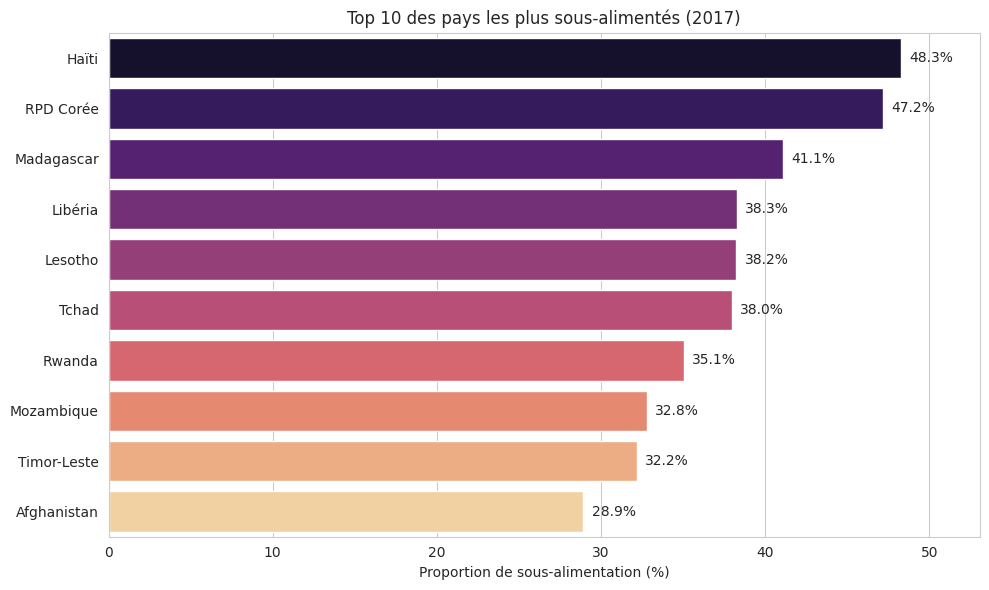

In [ ]:
# Graphique : Top 10 pays sous alimenté 2017

# Copie et extraction des 10 pays sous alimenté, trié, pour éviter de modifier l'original
df_top10 = df_pop_sous_nut_2017_sorted.head(10).copy()

df_top10['Zone'] = df_top10['Zone'].replace({'République populaire démocratique de Corée': 'RPD Corée'}) # Raccourci le nom du pays pour le graphique

plt.figure(figsize=(10, 6))           # Création nouvelle figure
sns.set_style("whitegrid")            # Fond gradrillé
sns.barplot(                          # déssine graphique à barre horizontale
    data=df_top10,
    x='proportion_sous_alimentation',
    y='Zone',
    hue='Zone',
    palette='magma',
    legend=False                      # Masquage des légendes deja présentes
)

plt.title("Top 10 des pays les plus sous-alimentés (2017)")
plt.xlabel("Proportion de sous-alimentation (%)")
plt.ylabel("")
plt.xlim(0, df_top10['proportion_sous_alimentation'].max() * 1.1) # axe x à 110% pour laisser de la place aux valeurs %

ax = plt.gca()                  # gca = get current axe : récupère l'axe actif ou le créé si inexistant
for bar in ax.patches:          # Boucle for pour chaque barre
    width = bar.get_width()
    ax.text(
        width + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",
        va='center'             # va = alignement vertical (ici centré)
    )

plt.tight_layout()
plt.show()

## 3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013

In [ ]:
#calcul du total de l'aide alimentaire par pays

df_total_aide_alimentaire = aide_alimentaire.groupby('Zone')['Quantité en kg'].sum() # groupby 'Zone' puis somme des Quantités en kg de l'aide alimentaire tout produits confondu
df_total_aide_alimentaire.head(10)


,Quantité en kg
Zone,
Afghanistan,185452000
Algérie,81114000
Angola,5014000
Bangladesh,348188000
Bhoutan,2666000
Bolivie (État plurinational de),6000
Burkina Faso,64812000
Burundi,77318000
Bénin,22224000


In [ ]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire

df_total_aide_alimentaire_sorted = df_total_aide_alimentaire.sort_values(ascending=False)

df_total_aide_alimentaire_sorted.head(10)

,Quantité en kg
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000
Kenya,552836000
Bangladesh,348188000
Somalie,292678000
République démocratique du Congo,288502000


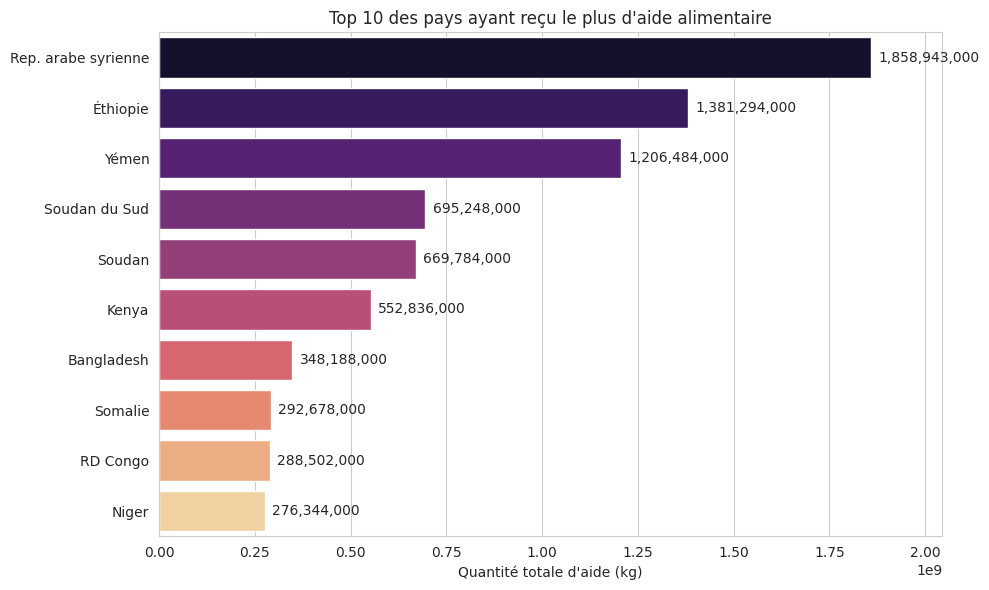

In [ ]:
# Graphique : Top 10 pays ayant reçu le plus d'aide alimentaire entre 2013 et 2016

df_top10_aide = df_total_aide_alimentaire_sorted.head(10)

df_aide = df_top10_aide.reset_index()
df_aide.columns = ['Zone', 'Quantité en kg']

df_aide['Zone'] = df_aide['Zone'].replace({'République arabe syrienne': 'Rep. arabe syrienne','République démocratique du Congo': 'RD Congo'})

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=df_aide,
    x='Quantité en kg',
    y='Zone',
    hue='Zone',
    palette='magma'
)

plt.title("Top 10 des pays ayant reçu le plus d'aide alimentaire")
plt.xlabel("Quantité totale d'aide (kg)")
plt.ylabel("")
plt.xlim(0, df_aide['Quantité en kg'].max() * 1.1)

for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + df_aide['Quantité en kg'].max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,.0f}",
        va='center'
    )

plt.tight_layout()
plt.show()

## 3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016

In [ ]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année

df_aide_selection = aide_alimentaire[['Zone', 'Année', 'Quantité en kg']]

df_new_aide_alimentaire = df_aide_selection.groupby(['Zone', 'Année'])['Quantité en kg'].sum().reset_index()

df_new_aide_alimentaire.head()


,Zone,Année,Quantité en kg
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000


In [ ]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

df_top5_aide_alimentaire = df_new_aide_alimentaire.groupby('Zone')['Quantité en kg'].sum().sort_values(ascending=False)

df_top5_aide_alimentaire.head()

,Quantité en kg
Zone,
République arabe syrienne,1858943000
Éthiopie,1381294000
Yémen,1206484000
Soudan du Sud,695248000
Soudan,669784000


In [ ]:
#On filtre sur le dataframe avec notre liste

df_top5_pays = df_top5_aide_alimentaire.head(5).index.tolist()  #Récupérer les 5 pays les mieux aidés

df_aide_top5 = aide_alimentaire.loc[aide_alimentaire['Zone'].isin(df_top5_pays)] #Filtrer le DataFrame d’origine pour ne garder que ces pays

df_aide_top5.head()

,Zone,Année,Produit,Quantité en kg
354,Éthiopie,2013,Autres non-céréales,170000
355,Éthiopie,2014,Autres non-céréales,466000
356,Éthiopie,2015,Autres non-céréales,244000
357,Éthiopie,2013,Blé et Farin,181066000
358,Éthiopie,2014,Blé et Farin,178646000


In [ ]:
# Affichage des pays avec l'aide alimentaire par année

df_aide_par_pays_annee = (df_aide_top5.groupby(['Zone', 'Année'])['Quantité en kg'].sum().unstack('Année').fillna(0)) # on additionne toutes les quantités, quels que soient les produits

df_aide_par_pays_annee.head()

Année,2013,2014,2015,2016
Zone,,,,
République arabe syrienne,563566000.0,651870000.0,524949000.0,118558000.0
Soudan,330230000.0,321904000.0,17650000.0,0.0
Soudan du Sud,196330000.0,450610000.0,48308000.0,0.0
Yémen,264764000.0,103840000.0,372306000.0,465574000.0
Éthiopie,591404000.0,586624000.0,203266000.0,0.0


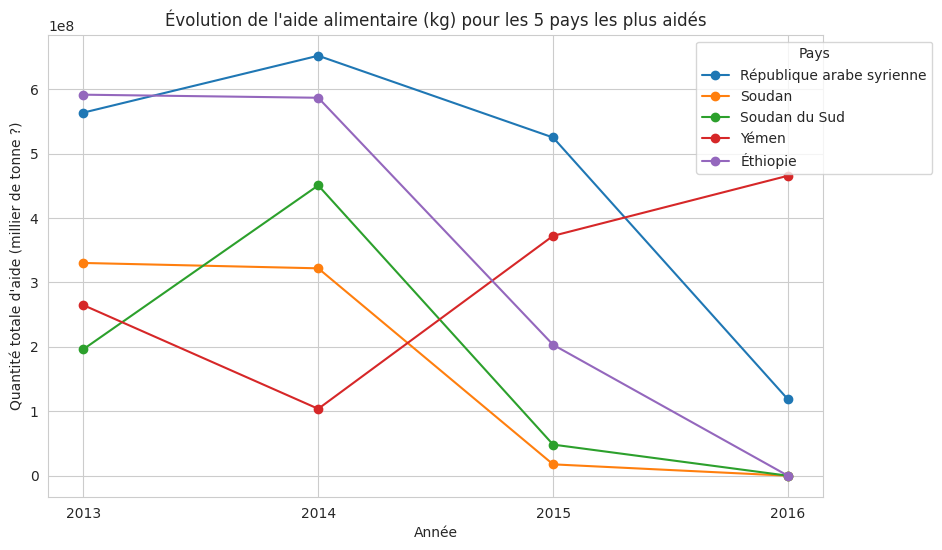

In [ ]:
# Graphique : Evolution de l'aide alimentaire pour les 5 pays les plus aidés

df_annees = df_aide_par_pays_annee.columns.astype(int) # convertie les années en entier pour etre traité comme une echelle numérique. Facilite la lecture

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

for zone in df_aide_par_pays_annee.index:
    plt.plot(
        df_annees,
        df_aide_par_pays_annee.loc[zone, df_annees],
        marker='o',                                 # ajoute un petit point à chaque point de donnée
        label=zone
    )

plt.title("Évolution de l'aide alimentaire (kg) pour les 5 pays les plus aidés")
plt.xlabel("Année")
plt.ylabel("Quantité totale d'aide (millier de tonne ?)")
plt.xticks(df_annees)
plt.legend(title="Pays", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()


## 3.9 - Pays avec le moins de disponibilité par habitant

In [ ]:
#Calcul de la disponibilité en kcal par personne par jour par pays

kcal_totaux = df_dispo_pop.groupby('Zone')['dispo_kcal'].sum() # somme la Serie de kcal par personne et par jour par Zone
pop_by_zone = df_dispo_pop.groupby('Zone')['Population'].first() # Récupère la Serie Population (chaque ligne a la valeur Pop mais il en faut qu'une) .first ne prend qu'une seule de ces valeurs pour ne pas avoir de doublon
kcal_par_personne = kcal_totaux / pop_by_zone # division des deux séries

print(kcal_par_personne)

Zone
Afghanistan              2087.0
Afrique du Sud           3020.0
Albanie                  3188.0
Algérie                  3293.0
Allemagne                3503.0
                          ...  
Émirats arabes unis      3275.0
Équateur                 2346.0
États-Unis d'Amérique    3682.0
Éthiopie                 2129.0
Îles Salomon             2383.0
Length: 174, dtype: float64


In [ ]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne

df_top_10_moins_dispo_kcal = df_dispo_pop.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=True)
df_top_10_moins_dispo_kcal.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


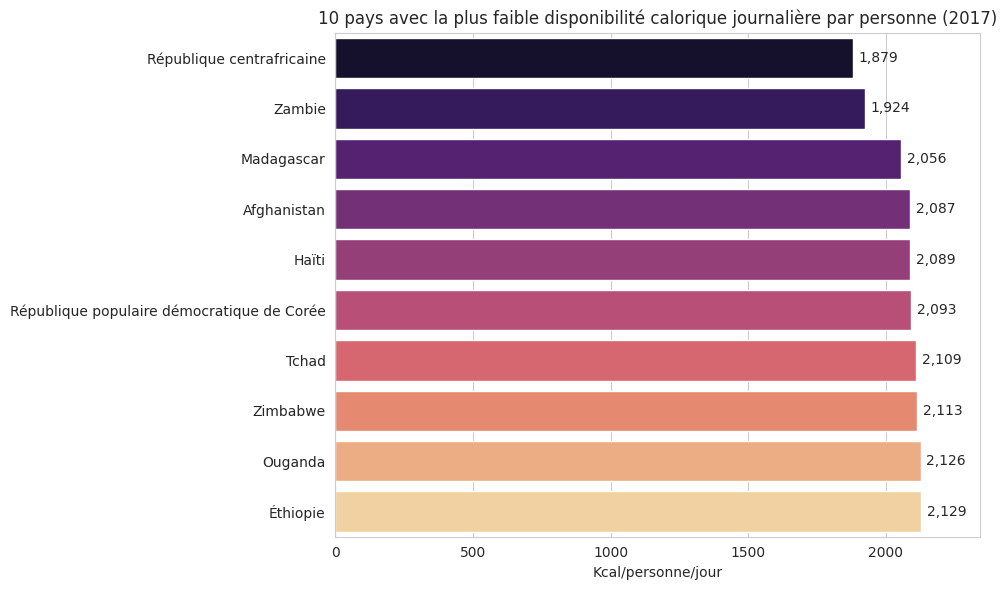

In [ ]:
# Graphique : Top 10 pays avec la plus faible disponibilité alimentaire par jour et par personne en 2017

df_top_10_moins_dispo_kcal = (df_dispo_pop.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=True))

# Préparer le DataFrame bottom10_kcal
df_bottom10_kcal = df_top_10_moins_dispo_kcal.head(10).reset_index()
df_bottom10_kcal.columns = ['Zone', 'Dispo_kcal_per_person_day']

# Tracé du barplot horizontal
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=df_bottom10_kcal,
    x='Dispo_kcal_per_person_day',
    y='Zone',
    hue='Zone',
    palette='magma',
    legend=False
)

# Mise en forme
plt.title("10 pays avec la plus faible disponibilité calorique journalière par personne (2017)")
plt.xlabel("Kcal/personne/jour")
plt.ylabel("")
plt.xlim(0, df_bottom10_kcal['Dispo_kcal_per_person_day'].max() * 1.1)

# Annotation des barres
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + df_bottom10_kcal['Dispo_kcal_per_person_day'].max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,.0f}",
        va='center'
    )

plt.tight_layout()
plt.show()

## 3.10 - Pays avec le plus de disponibilité par habitant

In [ ]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne

df_top_10_plus_dispo_kcal = df_dispo_pop.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False)
df_top_10_plus_dispo_kcal.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


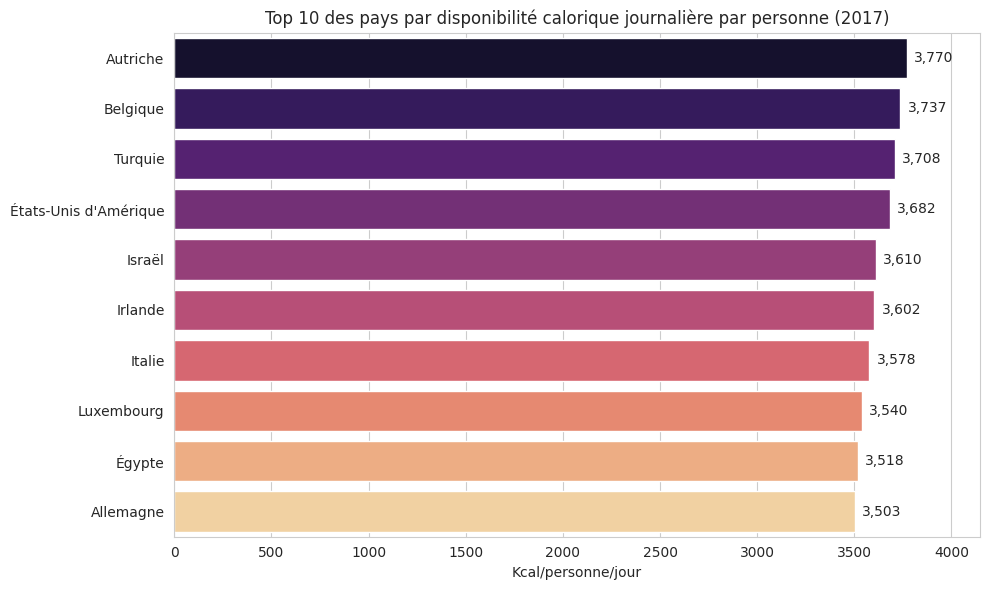

In [ ]:
# Graphique : Top 10 des pays ayant le plus de disponibilité calorique par personne et par jour

df_top_10_plus_dispo_kcal = (df_dispo_pop.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum().sort_values(ascending=False))

df_top10_kcal = df_top_10_plus_dispo_kcal.head(10).reset_index()
df_top10_kcal.columns = ['Zone', 'Dispo_kcal_per_person_day']

# Tracé du barplot horizontal
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    data=df_top10_kcal,
    x='Dispo_kcal_per_person_day',
    y='Zone',
    hue='Zone',
    palette='magma',
    legend=False
)

# Mise en forme
plt.title("Top 10 des pays par disponibilité calorique journalière par personne (2017)")
plt.xlabel("Kcal/personne/jour")
plt.ylabel("")
plt.xlim(0, df_top10_kcal['Dispo_kcal_per_person_day'].max() * 1.1)

# Annotation des barres
for bar in ax.patches:
    width = bar.get_width()
    ax.text(
        width + df_top10_kcal['Dispo_kcal_per_person_day'].max() * 0.01,
        bar.get_y() + bar.get_height() / 2,
        f"{width:,.0f}",
        va='center'
    )

plt.tight_layout()
plt.show()

## 3.11 - Exemple de la Thaïlande pour le Manioc

In [ ]:
#création d'un dataframe avec uniquement la Thaïlande

df_data_thailande = df_dispo_pop.loc[(df_dispo_pop['Zone'] == 'Thaïlande')]

df_data_thailande.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
13759,Thaïlande,Abats Comestible,animale,0.0,0.0,3.0,1.11,0.09,0.56,74000000.0,...,33000000.0,75000000.0,0.0,4.500000e+07,0.0,0.0,0.0,2017.0,69209810.0,207629430.0
13760,Thaïlande,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.09,0.00,0.00,8000000.0,...,2000000.0,6000000.0,0.0,1.200000e+07,0.0,2000000.0,0.0,2017.0,69209810.0,0.0
13761,Thaïlande,"Alcool, non Comestible",vegetale,0.0,358000000.0,0.0,0.00,0.00,0.00,358000000.0,...,21000000.0,0.0,0.0,4.470000e+08,0.0,0.0,0.0,2017.0,69209810.0,0.0
13762,Thaïlande,Aliments pour enfants,vegetale,0.0,0.0,2.0,0.18,0.01,0.08,12000000.0,...,19000000.0,12000000.0,0.0,0.000000e+00,0.0,0.0,0.0,2017.0,69209810.0,138419620.0
13763,Thaïlande,Ananas,vegetale,0.0,0.0,10.0,10.02,0.04,0.08,782000000.0,...,9000000.0,671000000.0,110000000.0,2.209000e+09,0.0,0.0,13000000.0,2017.0,69209810.0,692098100.0


In [ ]:
#Calcul de la sous nutrition en Thaïlande

df_pop_sous_nut_thai = df_pop_sous_nut_2017.loc[(df_pop_sous_nut_2017['Zone'] == 'Thaïlande')].sort_values('sous_nutrition')
df_pop_sous_nut_thai.head()

,Zone,Année,Population,sous_nutrition,proportion_sous_alimentation
218,Thaïlande,2017,69209810.0,6200000.0,8.958268


In [ ]:
# Data Frame Manioc

df_data_thailande_manioc = df_data_thailande.loc[(df_data_thailande['Produit'] == 'Manioc')]

df_data_thailande_manioc.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population,dispo_kcal
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,...,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0,2017.0,69209810.0,2.768392e+09


In [ ]:
# Utilisation du manioc (Aliments pour animaux, Autres Utilisations, Nourriture, Pertes, Semences, Traitement)

usages = [
    'Aliments pour animaux',
    'Autres Utilisations',
    'Nourriture',
    'Pertes',
    'Semences',
    'Traitement'
]

usage_totals_ind = df_data_thailande_manioc[usages].sum() # somme quantités pour chaque usage
total_usage = usage_totals_ind.sum()                      # Somme de tous les usages confondus

usage_pourcentage = usage_totals_ind / total_usage * 100 # Calcule des pourcentages

print("Répartition des usages du manioc en Thaïlande (en % de l’usage total) :")
for usage, pct in usage_pourcentage.items():
      print(f"{usage} : {pct:.2f}%")

Répartition des usages du manioc en Thaïlande (en % de l’usage total) :
Aliments pour animaux : 28.74%
Autres Utilisations : 33.23%
Nourriture : 13.91%
Pertes : 24.13%
Semences : 0.00%
Traitement : 0.00%


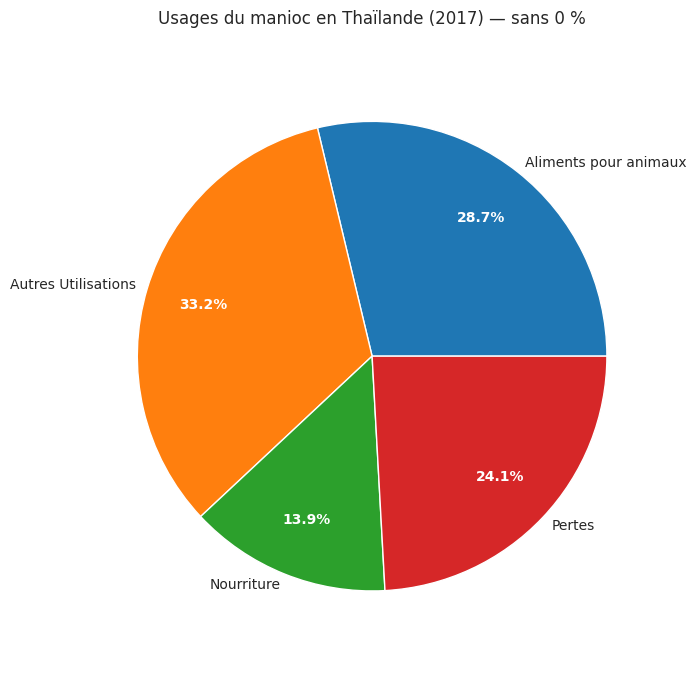

In [ ]:
# Graphique : Usage manioc en thailande

df_usage_manioc = usage_pourcentage.reset_index()
df_usage_manioc.columns = ['Usage', 'Pourcentage']

df_plot = df_usage_manioc[df_usage_manioc['Pourcentage'] > 0]

fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    df_plot['Pourcentage'],
    labels=df_plot['Usage'],
    autopct='%1.1f%%',
    pctdistance=0.75,
    labeldistance=1.05,
    wedgeprops={'edgecolor':'white'}
)
for txt in autotexts:
    txt.set_color('white')
    txt.set_fontweight('bold')
ax.axis('equal')
plt.title("Usages du manioc en Thaïlande (2017) — sans 0 %")
plt.tight_layout()
plt.show()

In [ ]:
# Quelle est la proportion exportée en fonction de la disponibilité intérieure

export_manioc = df_data_thailande_manioc['Exportations - Quantité'].values[0]
dispo_int_faostat = df_data_thailande['Disponibilité intérieure'].sum()

taux_export_manioc = export_manioc / dispo_int_faostat * 100

# 2) Affichage formaté
print(f"Exportations de manioc (kg) : {export_manioc:,.0f}")
print(f"Disponibilité intérieure tout produit (kg): {dispo_int_faostat:,.0f}")
print(f"Taux d’exportation du manioc : {taux_export_manioc:.1f}%")

Exportations de manioc (kg) : 25,214,000,000
Disponibilité intérieure tout produit (kg): 158,130,000,000
Taux d’exportation du manioc : 15.9%


# Etape 6 - Analyse complémentaires

In [ ]:
#Rajouter en dessous toutes les analyses complémentaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être
#le plus en difficulté au niveau alimentaire"

In [ ]:
# 	Pays “à risque” : disponibilité ≤ 2 300 kcal/pers./jour
# 	Repérer les pays dont l’apport énergétique total (toutes origines) est proche ou en‑dessous du besoin moyen ; dresser une carte ou un tableau de classement.

df_pays_a_risque = kcal_par_personne.loc[kcal_par_personne <= 2300].sort_values()

nb_pays_a_risque = df_pays_a_risque.count()

print(f"Nombre de pays à risque (≤ 2 300 kcal/personne/jour) : {nb_pays_a_risque}")

df_pays_a_risque.head(23)

Nombre de pays à risque (≤ 2 300 kcal/personne/jour) : 22


,0
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


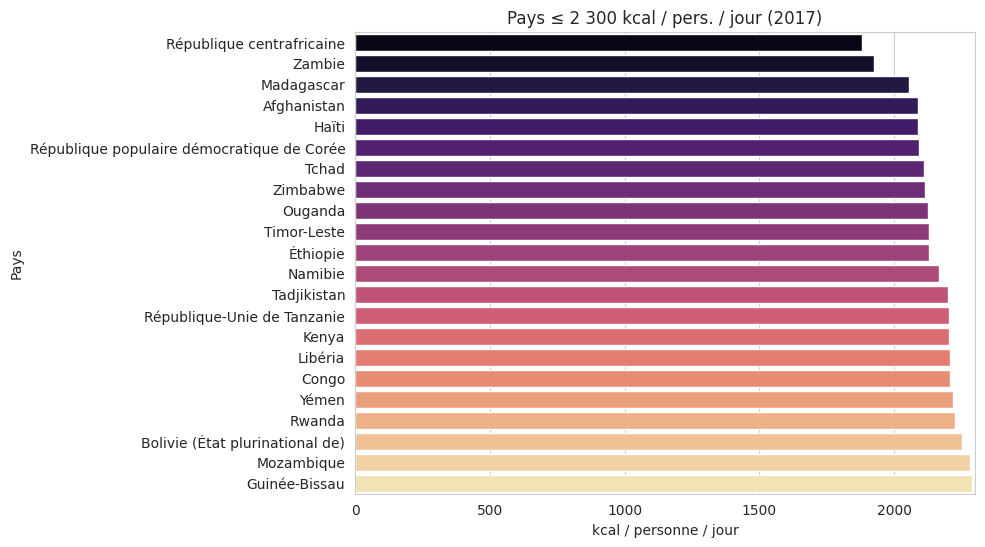

In [ ]:
# Graphique : Pays ayant moins de 2300 kcal par personne et par jour en 2017

# Sélection des pays ≤ 2 300 kcal
df_pays_a_risque = kcal_par_personne.loc[kcal_par_personne <= 2300]

# Transformation en DataFrame + renommage
pays_a_risque_df = df_pays_a_risque.reset_index()
pays_a_risque_df.columns = ['Zone', 'kcal_pers_jour']   # nommer clairement les colonnes

plt.figure(figsize=(8, 6))
sns.barplot(
    data=pays_a_risque_df.sort_values('kcal_pers_jour'),  # ordre croissant
    y='Zone',
    x='kcal_pers_jour',
    palette='magma',
    hue='Zone'
)
plt.xlabel("kcal / personne / jour")
plt.ylabel("Pays")
plt.title("Pays ≤ 2 300 kcal / pers. / jour (2017)")
plt.xlim(0, 2300)
plt.show()


In [ ]:
# Top produits exportés par pays à risque
# Lister, pour les 10 pays avec la plus forte sous‑alimentation, quels produits ils exportent le plus > pistes de paradoxe “exporte mais manque”.

df_risk_countries = df_pays_a_risque.index[:10]

# Construire un DataFrame des exportations
df_exports = df_dispo_pop[['Zone', 'Produit', 'Exportations - Quantité']].copy()

# Somme des volumes exportés par pays et produit
exports_sum = (df_exports[df_exports['Zone'].isin(df_risk_countries)].groupby(['Zone', 'Produit'], as_index=False)['Exportations - Quantité'].sum())

# Pour chaque pays, ne garder que le produit le plus exporté
df_top_export_by_country = (exports_sum.sort_values(['Zone', 'Exportations - Quantité'], ascending=[True, False]).groupby('Zone', as_index=False).first())

# Affichage du résultat
print("Top produit exporté par chacun des 10 pays à risque :")
df_top_export_by_country.head(10)

Top produit exporté par chacun des 10 pays à risque :


,Zone,Produit,Exportations - Quantité
0,Afghanistan,Raisin,97000000.0
1,Bolivie (État plurinational de),Soja,681000000.0
2,Congo,Huile de Palme,4000000.0
3,Guinée-Bissau,Noix,196000000.0
4,Haïti,"Fruits, Autres",11000000.0
5,Kenya,Thé,451000000.0
6,Libéria,Blé,19000000.0
7,Madagascar,Sucre Eq Brut,70000000.0
8,Mozambique,Sucre Eq Brut,173000000.0
9,Namibie,Poissons Pelagiques,271000000.0
